## This note will only serve to test the API

- First download MongoDB Client 
(https://www.mongodb.com/try/download/community)


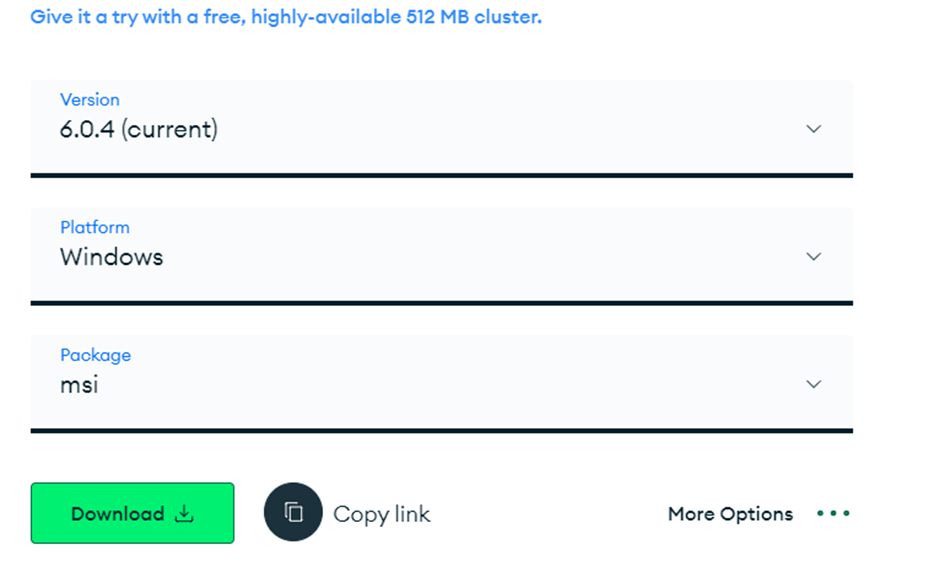

- Get Docker to deploy the API (https://www.docker.com/products/docker-desktop/)

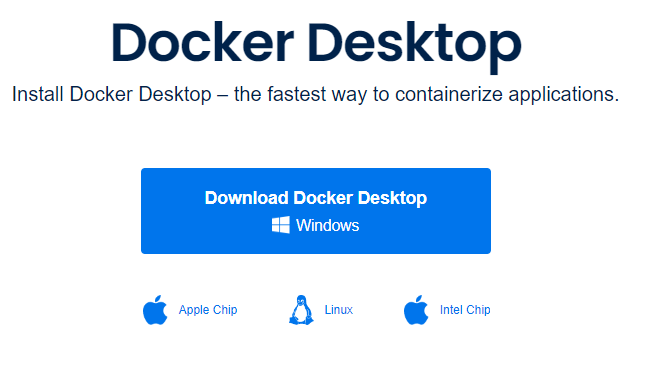

- You must have Python 3.7 or high to execute this code

- Before executing PIP for libraries installation, make sure that you have updated PIP
- python.exe -m pip install --upgrade pip

- Install following important libararies for this project
    - fastapi
    - pydantic
    - uuid
    - pymongo
    - uvicorn
    - Other libraries are usually bydefault

## My System is ready Now

- Lets check MongoDB

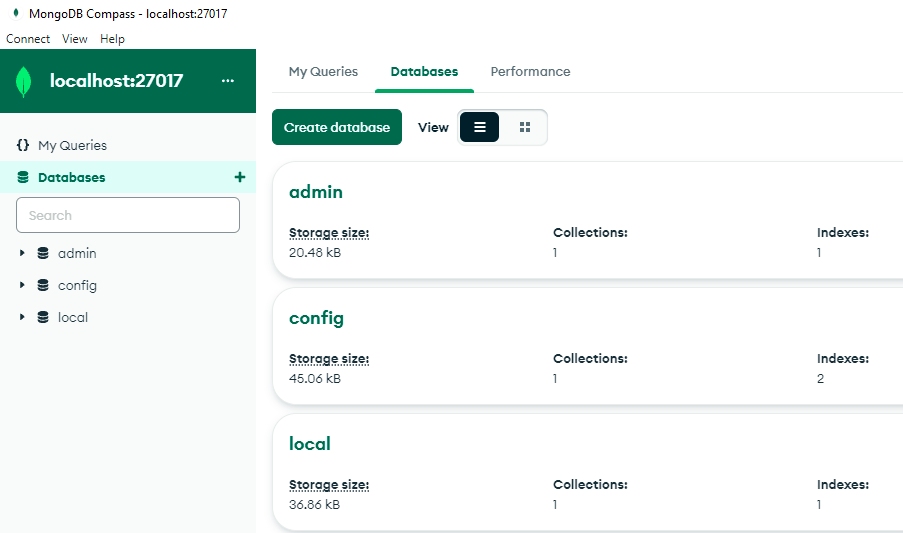

## Now Lets Move to System Implementation

I have written different modules using classes and functions and deployed over FastAPI.

- to check those functions, check `main.py` file (attached with email)
    
### How to execute this?

- You can execute main.py from CMD by using:-
    - uvicorn main:app --reload
- Or you can place following code at the end of main.py file. (I have done this)

    ```python
       if __name__ == "__main__":
            uvicorn.run("main:app", host="127.0.0.1", port=8000, reload=True)
    ```
    - Then simply execute `python main.py`
    - You can change port number easily from above option
    - You can change host to other server address
    
## How to create Database in Mongo?

```python
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client["candidate_db"]
```

## Now Lets Go to main.py

-
-
-
-
-

## Welcome Back

## Now Docker Deployment

Here are the steps to deploy the code as a Docker-Compose application:

### Create a Dockerfile for the API code:

In the same directory as the code, create a file named "Dockerfile".

Add the following code to the file:


```python
FROM python:3.8-slim-buster

COPY . /app
WORKDIR /app

RUN pip install fastapi uvicorn pydantic uuid

ENV PYTHONUNBUFFERED=1

CMD ["uvicorn", "main:app", "--host", "0.0.0.0", "--port", "8000"]
```

### Create a docker-compose.yml file:

In the same directory, create a file named "docker-compose.yml".

Add the following code to the file:


```python
version: '3'
services:
  api:
    build: .
    ports:
      - 8000:8000
```

### Run the Docker Compose command:

In the terminal, navigate to the directory where the Dockerfiles are located.

Run the following command:

```python
docker-compose up --build
```

### Test the API:

Once the containers are up and running, you can test the API by accessing http://localhost:8000 in a web browser or using a tool like curl or postman.

This will deploy the FastAPI code as a Docker-Composed application. Note that this assumes you have Docker and Docker Compose installed on your system.

## Now Execute the Fast API

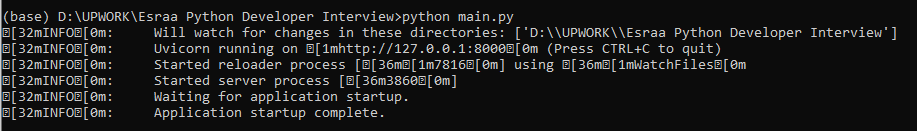

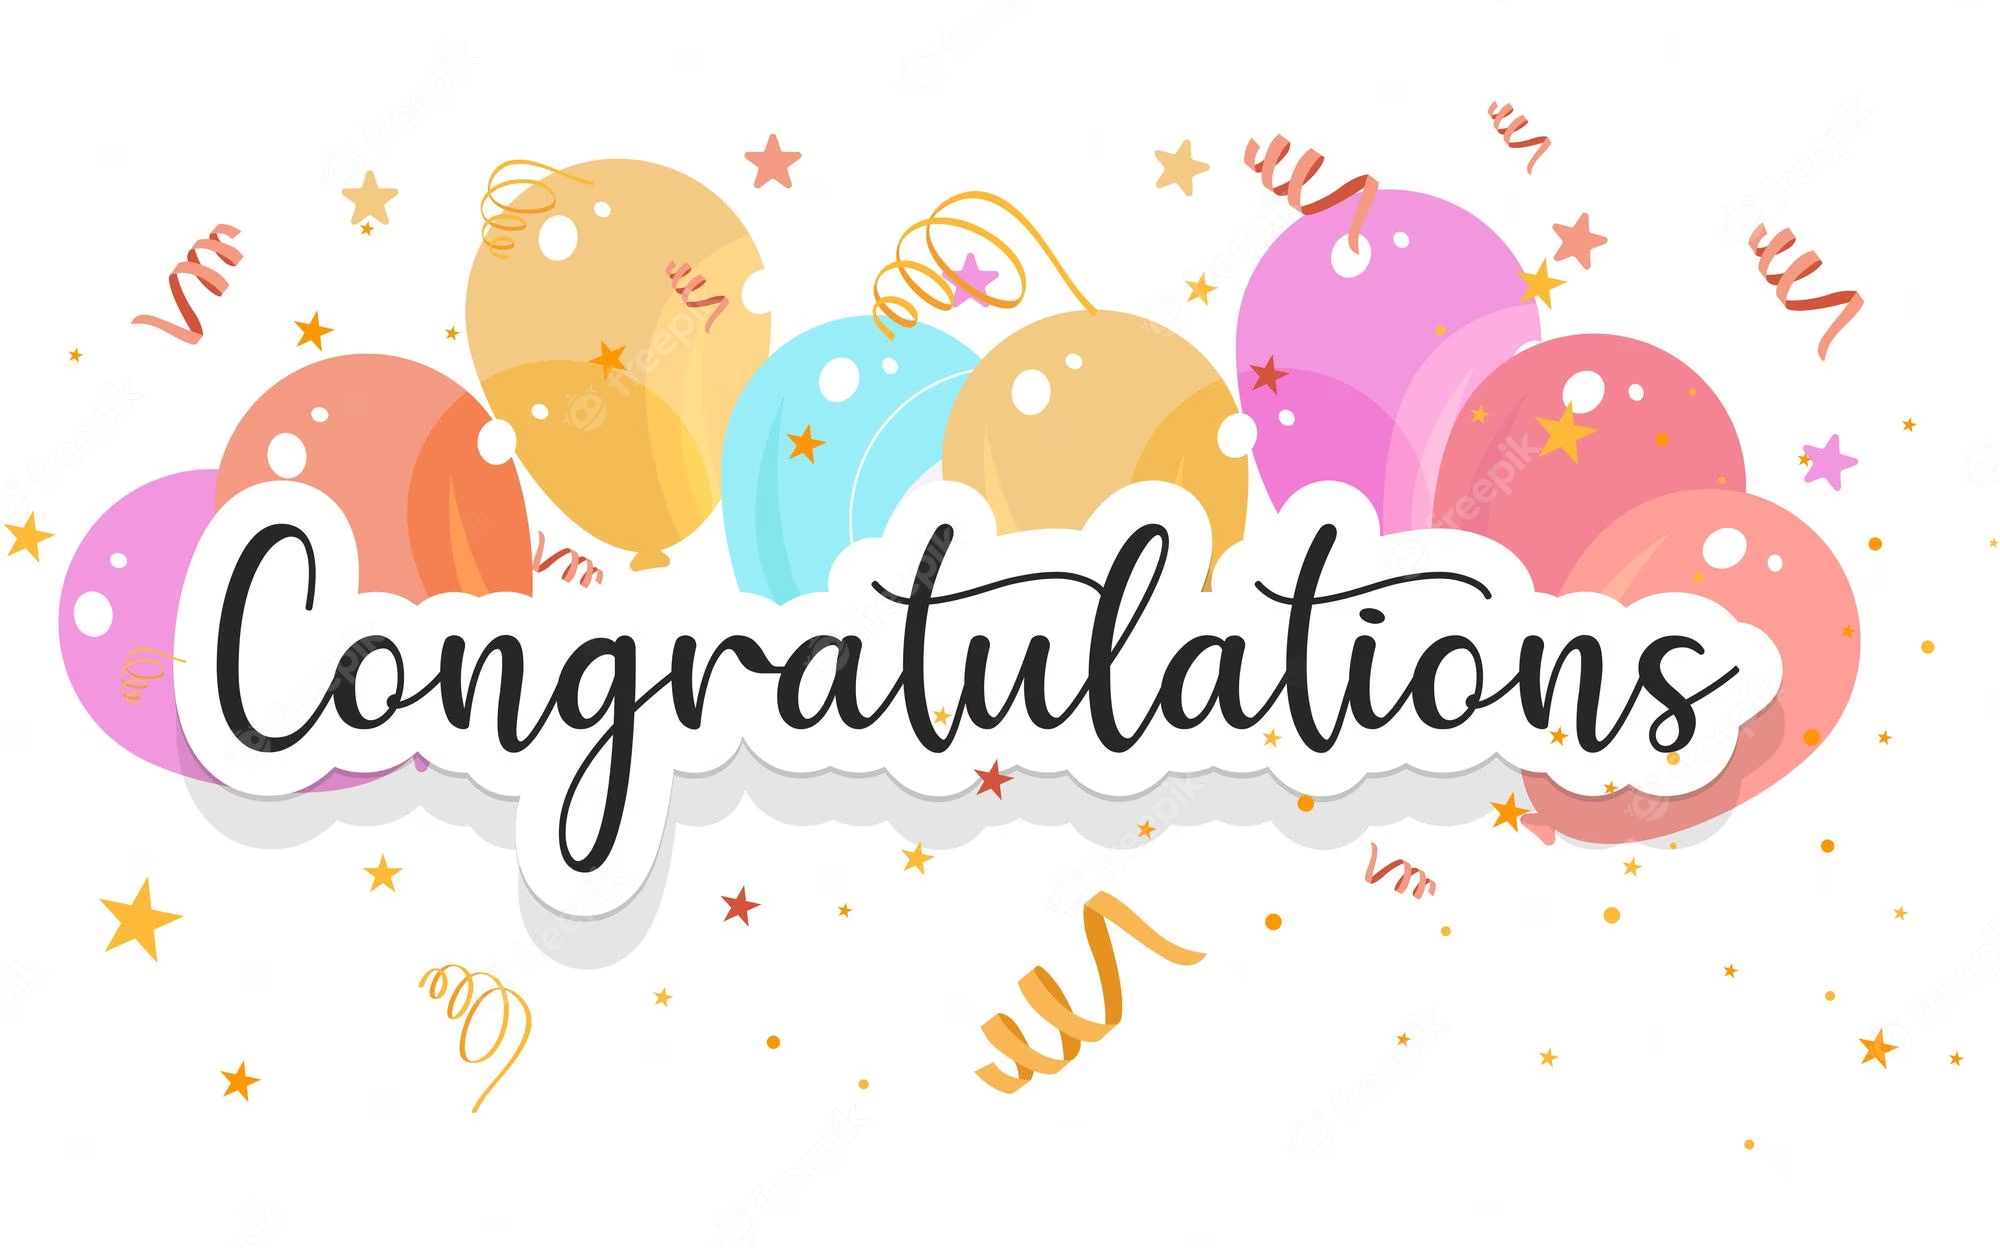

## Lets Test the APIs

## Initially DB is empty - No Database

Now Lets Check

simply type http://localhost:8000/ in URL

If you see following, means API is working

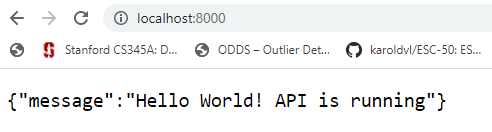

## Call API to create/ Add user

In [251]:
import requests

def addUser(payload):
    url = "http://localhost:8000/user"

    headers = {
        'Content-Type': 'application/json'
    }
    
    response = requests.post(url, json=payload, headers=headers)
    
    print(str(response.text))

In [252]:
payload = {"first_name":"Rafi", "last_name":"Afridi", "email":"rafi.afridi@example.com"}
addUser(payload)

{"user_id":"63df9fcde816060fd85b03cb","user":{"first_name":"Rafi","last_name":"Afridi","email":"rafi.afridi@example.com"}}


In [253]:
payload = {"first_name":"Zohaib", "last_name":"Afridi", "email":"zohaib.afridi@example.com"}
addUser(payload)

{"user_id":"63df9fe2e816060fd85b03cc","user":{"first_name":"Zohaib","last_name":"Afridi","email":"zohaib.afridi@example.com"}}


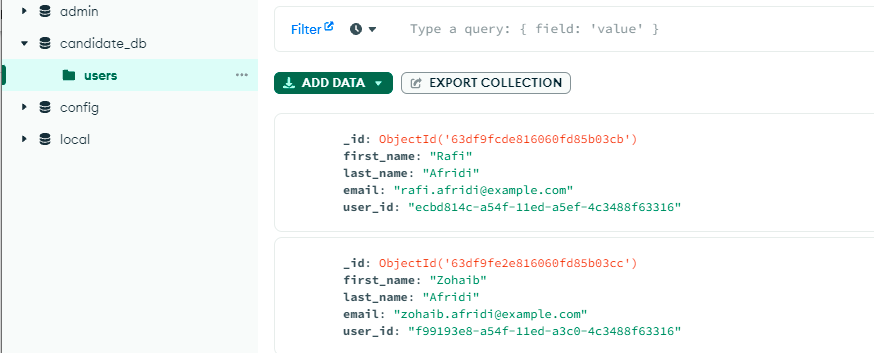

## How to convert Str Obj value to ObjectID

In [254]:
string_object_id = "63df9fcde816060fd85b03cb"
object_id = bson.ObjectId(string_object_id)
object_id

ObjectId('63df9fcde816060fd85b03cb')

In [255]:
def addCandidate(payload, user_id):
    
    url = "http://localhost:8000/candidate"
    
    headers = {
    'Content-Type': 'application/json',
    'Authorization' : user_id
    }
    
    response = requests.post(url, json=payload, headers=headers)
    
    print(response.status_code)
    print(response.json())

## Call API to create/ Add Candidate

In [256]:
payload = {
    "UUID" : '63df9fcde816060fd85b03cb',
    "first_name":"Rafi",
    "last_name":"Afridi",
    "email":"rafi.afridi@example.com",
    "career_level": "Mid Level",
    "job_major": "Computer Science",
    "years_of_experience": 5,
    "degree_type": "Bachelor",
    "skills": ["Python", "JavaScript", "SQL"],
    "nationality": "USA",
    "city": "New York",
    "salary": 800000,
    "gender": "Male"
}
user_id = "ecbd814c-a54f-11ed-a5ef-4c3488f63316"

addCandidate(payload, user_id)

200
{'message': 'Candidate created successfully'}


In [257]:
payload = {
    "UUID" : '63df9fe2e816060fd85b03cc',
    "first_name":"Zohaib",
    "last_name":"Afridi",
    "email":"zohaib.afridi@example.com",
    "career_level": "Senior",
    "job_major": "Computer Science (Machine Learning)",
    "years_of_experience": 10,
    "degree_type": "Masters",
    "skills": ["Python", "Flask", "SQL"],
    "nationality": "Pakistan",
    "city": "New York",
    "salary": 800000,
    "gender": "Male"
}
user_id = "f99193e8-a54f-11ed-a3c0-4c3488f63316"

addCandidate(payload, user_id)

200
{'message': 'Candidate created successfully'}


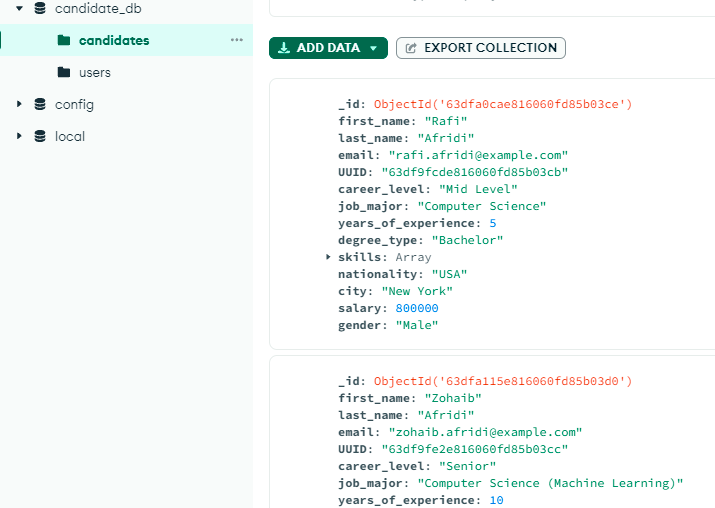

## Call API to get All Candidates

In [292]:
import requests

url = "http://localhost:8000/all-candidates"


headers = {
    'Authorization' : "f99193e8-a54f-11ed-a3c0-4c3488f63316"
}

response = requests.get(url, headers=headers)

response.json()

{'candidates': [{'first_name': 'Rafi',
   'last_name': 'Afridi',
   'email': 'rafi.afridi@example.com',
   'UUID': '63df9fcde816060fd85b03cb',
   'career_level': 'Mid Level',
   'job_major': 'Computer Science',
   'years_of_experience': 5,
   'degree_type': 'Bachelor',
   'skills': ['Python', 'JavaScript', 'SQL'],
   'nationality': 'USA',
   'city': 'New York',
   'salary': 800000.0,
   'gender': 'Male'},
  {'first_name': 'Zohaib',
   'last_name': 'Afridi',
   'email': 'zohaib.afridi@example.com',
   'UUID': '63df9fe2e816060fd85b03cc',
   'career_level': 'Senior',
   'job_major': 'Computer Science (Machine Learning)',
   'years_of_experience': 10,
   'degree_type': 'Masters',
   'skills': ['Python', 'Flask', 'SQL'],
   'nationality': 'Pakistan',
   'city': 'New York',
   'salary': 800000.0,
   'gender': 'Male'}]}

## If unathorized person call API, then

In [259]:
import requests

url = "http://localhost:8000/all-candidates"


headers = {
    'Authorization' : "unathorized person"
}

response = requests.get(url, headers=headers)

response.json()

{'detail': 'Not authorized'}

## API Call to Extract Candidate using ID

In [261]:
import requests

# Update endpoint
url = "http://localhost:8000/candidate/{candidate_id}"
# Replace `candidate_id` with the id of the candidate you want to update
url = url.format(candidate_id="63dfa0cae816060fd85b03ce")

print(url)

headers = {
    'Authorization' : "f99193e8-a54f-11ed-a3c0-4c3488f63316"
}

response = requests.get(url, headers=headers)

response.json()

http://localhost:8000/candidate/63dfa0cae816060fd85b03ce


{'_id': '63dfa0cae816060fd85b03ce',
 'first_name': 'Rafi',
 'last_name': 'Afridi',
 'email': 'rafi.afridi@example.com',
 'UUID': '63df9fcde816060fd85b03cb',
 'career_level': 'Mid Level',
 'job_major': 'Computer Science',
 'years_of_experience': 5,
 'degree_type': 'Bachelor',
 'skills': ['Python', 'JavaScript', 'SQL'],
 'nationality': 'USA',
 'city': 'New York',
 'salary': 800000.0,
 'gender': 'Male'}

In [262]:
import requests

# Update endpoint
url = "http://localhost:8000/candidate/{candidate_id}"
# Replace `candidate_id` with the id of the candidate you want to update
url = url.format(candidate_id="63dfa115e816060fd85b03d0")

print(url)

headers = {
    'Authorization' : "f99193e8-a54f-11ed-a3c0-4c3488f63316"
}

response = requests.get(url, headers=headers)

response.json()

http://localhost:8000/candidate/63dfa115e816060fd85b03d0


{'_id': '63dfa115e816060fd85b03d0',
 'first_name': 'Zohaib',
 'last_name': 'Afridi',
 'email': 'zohaib.afridi@example.com',
 'UUID': '63df9fe2e816060fd85b03cc',
 'career_level': 'Senior',
 'job_major': 'Computer Science (Machine Learning)',
 'years_of_experience': 10,
 'degree_type': 'Masters',
 'skills': ['Python', 'Flask', 'SQL'],
 'nationality': 'Pakistan',
 'city': 'New York',
 'salary': 800000.0,
 'gender': 'Male'}

## If unathorized person call API, then

In [275]:
import requests

# Update endpoint
url = "http://localhost:8000/candidate/{candidate_id}"
# Replace `candidate_id` with the id of the candidate you want to update
url = url.format(candidate_id="63dfa115e816060fd85b03d0")

print(url)

headers = {
    'Authorization' : "unknown person"
}

response = requests.get(url, headers=headers)

response.json()

http://localhost:8000/candidate/63dfa115e816060fd85b03d0


{'detail': 'Not authorized'}

## Search Data using Keywords

In [353]:
import requests
url = "http://localhost:8000/all-candidates"
headers = {
    'Authorization' : "f99193e8-a54f-11ed-a3c0-4c3488f63316"
}

params = {
    "query": "Flask"
}

response = requests.get(url, headers=headers, params=params)

In [354]:
response.json()

{'candidates': [{'first_name': 'Zohaib',
   'last_name': 'Afridi',
   'email': 'zohaib.afridi@example.com',
   'UUID': '63df9fe2e816060fd85b03cc',
   'career_level': 'Senior',
   'job_major': 'Computer Science (Machine Learning)',
   'years_of_experience': 10,
   'degree_type': 'Masters',
   'skills': ['Python', 'Flask', 'SQL'],
   'nationality': 'Pakistan',
   'city': 'New York',
   'salary': 800000.0,
   'gender': 'Male'}]}

In [352]:
url = "http://localhost:8000/all-candidates"

headers = {
    'Authorization' : "f99193e8-a54f-11ed-a3c0-4c3488f63316"
}

params = {
    "query": "Python"
}

response = requests.get(url, headers=headers, params=params)

response.json()

{'candidates': [{'first_name': 'Zohaib',
   'last_name': 'Afridi',
   'email': 'zohaib.afridi@example.com',
   'UUID': '63df9fe2e816060fd85b03cc',
   'career_level': 'Senior',
   'job_major': 'Computer Science (Machine Learning)',
   'years_of_experience': 10,
   'degree_type': 'Masters',
   'skills': ['Python', 'Flask', 'SQL'],
   'nationality': 'Pakistan',
   'city': 'New York',
   'salary': 800000.0,
   'gender': 'Male'},
  {'first_name': 'Rafi',
   'last_name': 'Afridi',
   'email': 'rafi.afridi@example.com',
   'UUID': '63df9fcde816060fd85b03cb',
   'career_level': 'Mid Level',
   'job_major': 'Computer Science',
   'years_of_experience': 5,
   'degree_type': 'Bachelor',
   'skills': ['Python', 'JavaScript', 'SQL'],
   'nationality': 'USA',
   'city': 'New York',
   'salary': 800000.0,
   'gender': 'Male'}]}

In [355]:
url = "http://localhost:8000/all-candidates"
headers = {
    'Authorization' : "f99193e8-a54f-11ed-a3c0-4c3488f63316"
}

query = "This Text Is Not Available"

response = requests.get(url, headers=headers, params={"query": query})

response.json()

{'candidates': []}

## Update Candidate using API Call

In [356]:
import requests

# Update endpoint
url = "http://localhost:8000/candidate/{candidate_id}"

# Replace `candidate_id` with the id of the candidate you want to update
url = url.format(candidate_id="63dfa0cae816060fd85b03ce")

print(url)

# Replace with the updated candidate information
payload = {
    "first_name": "Rafi",
    "last_name": "Afridi",
    "email": "john.doe@example.com",
    "career_level": "Manager",
    "job_major": "Information Technology",
    "years_of_experience": 10,
    "degree_type": "Bachelor's",
    "skills": ["Python", "JavaScript", "HTML", "CSS", "FastAPI", "MongoDB", "Others"],
    "nationality": "American",
    "city": "San Francisco",
    "salary": 100000,
    "gender": "Male"
}

# Replace `user_id` with the user's id who is making the request
headers = {
    "Authorization": "ecbd814c-a54f-11ed-a5ef-4c3488f63316"
}

# Make the PUT request
response = requests.put(url, json=payload, headers=headers)

# Check the response status code
if response.status_code == 200:
    print("Candidate updated successfully")
else:
    print("Failed to update candidate")

http://localhost:8000/candidate/63dfa0cae816060fd85b03ce
Candidate updated successfully


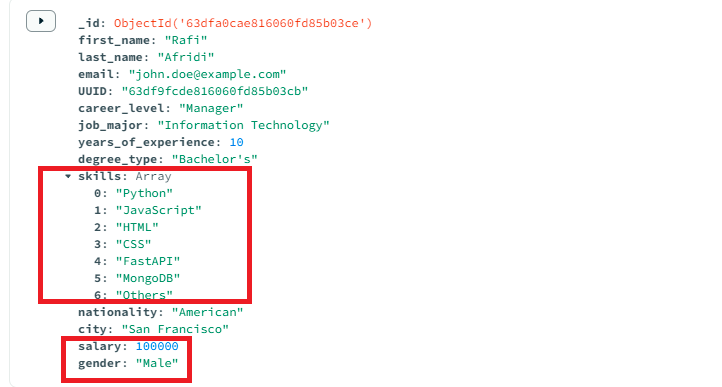

## Delete Candidate using API Call

In [357]:
import requests

# Define the URL for the endpoint
url = "http://localhost:8000/candidate/{candidate_id}"

# Define the header for the request
headers = {
    "Authorization": "ecbd814c-a54f-11ed-a5ef-4c3488f63316",
}

# Make a DELETE request to the endpoint, passing in the candidate_id and authorization
response = requests.delete(url.format(candidate_id="63dfa115e816060fd85b03d0"), headers=headers)

# Check the response status code
if response.status_code == 200:
    print("Candidate deleted successfully")
else:
    print("Error deleting candidate:", response.text)

Candidate deleted successfully


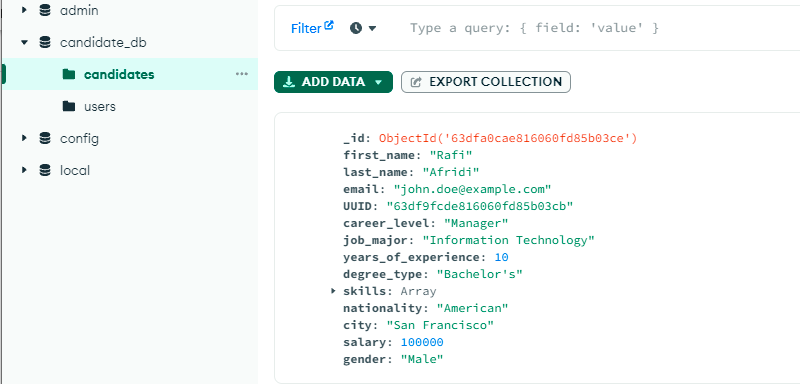

## Get Report

Go to http://localhost:8000/generate-report

You will have CSV file as shown

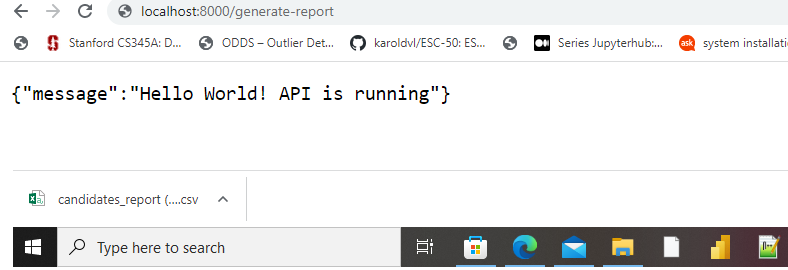

## Final Notes:


Assesment was amazing, i really enjoyed that. I have solved this as per my understanding in a bad condition (I had fever, because I was ill but I respect you and your valuable time - therefor i solved it rather wait for my health recovery).

I am will share all files with you.

If something is missing or you feel that it is not as per requirements, means it might be mis-understanding, but you will feel from my solution that I can solve and complete such tasks.

If you have any query, feel free to contact me.

Looking forward;
Thanks

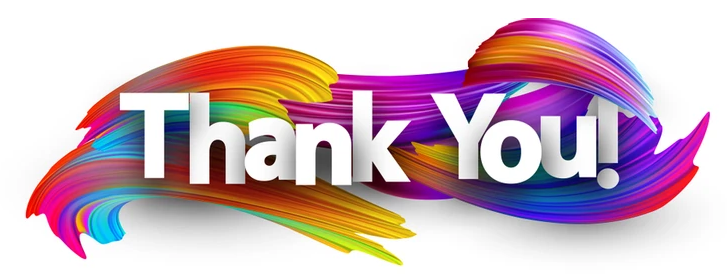